# Recurrent Neural Networks with Python - Project

##  1. Business Understanding



### Background Information

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### The Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### Metric for Success

Build a neural networks regression model with an RMSE  less than 10% of the target mean.

### Solutin Steps

* Load libraries and data.
* Data exploration & cleaning.
* Data preparation.
* Data modeling.
* Model evaluation.
* Summarize findings.
* Provide recommendations.
* Challenge the solution.


## Load Libraries and Data

In [1]:
# import standard libraries
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [2]:
# load dataset
train_df = pd.read_csv("https://bit.ly/38dSbSb")

## Data Exploration & Cleaning

In [3]:
# Sample dataset
train_df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
690,2014-10-01,48.439999,48.532001,47.130001,48.048000,48.048000,29708500
233,2012-12-06,6.764000,6.960000,6.700000,6.780000,6.780000,3302000
653,2014-08-08,50.231998,50.352001,49.299999,49.625999,49.625999,25450500
1179,2016-09-09,39.818001,39.984001,38.740002,38.894001,38.894001,18785000
315,2013-04-08,8.394000,8.510000,8.302000,8.366000,8.366000,8395000


In [4]:
# Statistical summary
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


In [5]:
# check data types of training set
train_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
# check shape
train_df.shape

(1258, 7)

In [7]:
# drop duplicates if any
train_df.drop_duplicates(inplace = True)
train_df.shape

(1258, 7)

In [8]:
# check for missing data
train_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

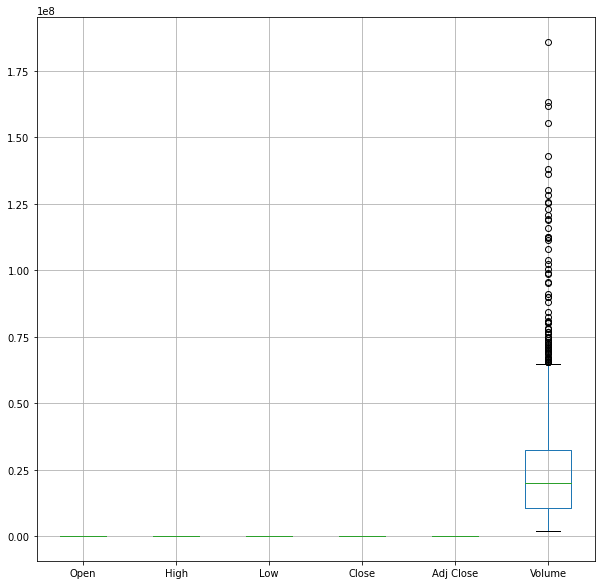

In [9]:
# visualize the distribution of outliers
plt.figure(figsize = (10, 10))
train_df.boxplot()
plt.show()

## Data Preparation

In [10]:
# Open is our desired feature for prediction.
train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [11]:
len(train_set)

1258

In [12]:
# feature scaling: Normalisation.  We do this because the values in the training dataset are not in the same range. 
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [14]:
# Create a dataset with 60 timesteps and 1 output

# a nested list, which will contain lists of 60 time-stamp prices. 
X_train = []

 # will contain a list of stock prices which is the next day stock price, corresponding to each list in X_train
Y_train = []

for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    Y_train.append(train_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
# preview X_train
print(X_train)

[[0.00888719 0.00609079 0.00436698 ... 0.03436123 0.04037541 0.04275043]
 [0.00609079 0.00436698 0.0022218  ... 0.04037541 0.04275043 0.04432101]
 [0.00436698 0.0022218  0.00145566 ... 0.04275043 0.04432101 0.04175445]
 ...
 [0.71128134 0.71434589 0.71105156 ... 0.69565219 0.69480939 0.72116457]
 [0.71434589 0.71105156 0.67358745 ... 0.69480939 0.72116457 0.74663857]
 [0.71105156 0.67358745 0.66799466 ... 0.72116457 0.74663857 0.73526148]]


In [16]:
# preview Y_train
print(Y_train)

[0.04432101 0.04175445 0.04102662 ... 0.74663857 0.73526148 0.72660406]


In [17]:
''' reshape our dataset to have 3D shape, because the input to LSTM layer of our RNN 
should be in 3D shape i.e. (samples, time-steps, features/indicators).
a. the samples are the number of samples in the input data.
b. the time-steps is the number of time-steps per sample. 
c. features correspond to the number of features per time-step i.e. one feature per time-step.
'''

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train.shape

(1198, 60, 1)

In [19]:
Y_train.shape

(1198,)

##  Data Modeling

### Model Training

In [20]:
# import the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
# Initialise the RNN
regressor = Sequential()

In [22]:
# Add 2 LSTM layers and some Dropout regularisation. 
# 'units' is the number of LSTM neurons in the layer.  'return_sequences' is True as we need to add another LSTM layer after the current one.
# 'input_shape' corresponds to the number of time stamps and the number of indicators.
#  For 'Dropout', 20% of 50 neurons will be ignored randomly during each iteration of training.

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Add output layer: 'output dimension' is 1 since we are predicting 1 price each time
regressor.add(Dense(units = 1))

In [23]:
# Compile the RNN 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
# Fit the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 9ms/step - loss: 0.0740
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 3/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 13/100
38/38 [=================

### Model Testing

In [25]:
# load test dataset
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [26]:
test_df.shape

(212, 7)

In [27]:
# get test dataset feature values
real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

Get the predicted stock price

In [28]:
# concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.

dataset_total = pd.concat((train_df['Open'], test_df['Open']), axis=0)

In [29]:
dataset_total.shape

(1470,)

In [30]:
# we create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.

inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values

In [31]:
# reshape the inputs to have only 1 column

inputs = inputs.reshape(-1, 1)

In [32]:
# use the scale set by the training set to scale the test inputs

inputs = sc.transform(inputs)

In [33]:
# create the test data structure just as we did for the train dataset

X_test = []

for i in range(60, 272):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [34]:
#  reshape test dataset to have 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
X_test.shape

(212, 60, 1)

In [36]:
# make predictions

predicted_stock_price = regressor.predict(X_test)

In [37]:
print(predicted_stock_price)

[[0.7357227]
 [1.1181793]
 [1.5430849]
 [1.7479556]
 [1.7768378]
 [1.6696625]
 [1.6189818]
 [1.7408183]
 [1.7846804]
 [1.6898708]
 [1.6659825]
 [1.7324715]
 [1.8860245]
 [1.9222264]
 [1.9116075]
 [1.8105175]
 [1.833791 ]
 [1.8862858]
 [2.06386  ]
 [2.1418183]
 [2.2147827]
 [2.8038187]
 [2.7445955]
 [2.2025096]
 [2.1281345]
 [2.4323578]
 [2.4792655]
 [2.4625762]
 [2.3269296]
 [2.4266753]
 [2.6438792]
 [2.911051 ]
 [2.8553803]
 [2.738149 ]
 [2.4908319]
 [2.5005305]
 [2.3733985]
 [2.2186425]
 [1.9425638]
 [2.1500432]
 [2.5831428]
 [2.547466 ]
 [2.3018343]
 [2.1184316]
 [1.8792114]
 [2.0078564]
 [2.0796762]
 [1.9322858]
 [1.9030471]
 [1.601937 ]
 [1.422545 ]
 [1.2875762]
 [1.2302821]
 [1.3673697]
 [1.478585 ]
 [1.6197541]
 [1.8361714]
 [1.9050732]
 [1.7564597]
 [1.6693814]
 [1.6311786]
 [1.6459446]
 [1.6140215]
 [1.6702218]
 [1.7134492]
 [1.810499 ]
 [1.8671949]
 [1.8846071]
 [1.9450045]
 [2.261851 ]
 [2.4783626]
 [2.3769765]
 [2.427164 ]
 [2.3176785]
 [2.2655046]
 [2.1984425]
 [2.271861 ]

In [38]:
# since we have predicted the scaled values, we reverse those values

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 43.736084]
 [ 63.704144]
 [ 85.88846 ]
 [ 96.58476 ]
 [ 98.092705]
 [ 92.49708 ]
 [ 89.85104 ]
 [ 96.21212 ]
 [ 98.50216 ]
 [ 93.552155]
 [ 92.30495 ]
 [ 95.77634 ]
 [103.793335]
 [105.68344 ]
 [105.12903 ]
 [ 99.85112 ]
 [101.06623 ]
 [103.806984]
 [113.078125]
 [117.14833 ]
 [120.95781 ]
 [151.71138 ]
 [148.61934 ]
 [120.31703 ]
 [116.4339  ]
 [132.3174  ]
 [134.76645 ]
 [133.8951  ]
 [126.812996]
 [132.02072 ]
 [143.36093 ]
 [157.30998 ]
 [154.40341 ]
 [148.28276 ]
 [135.37033 ]
 [135.8767  ]
 [129.23914 ]
 [121.159325]
 [106.745255]
 [117.57776 ]
 [140.18988 ]
 [138.32721 ]
 [125.50277 ]
 [115.927315]
 [103.43763 ]
 [110.15418 ]
 [113.90389 ]
 [106.20864 ]
 [104.68209 ]
 [ 88.961136]
 [ 79.59507 ]
 [ 72.548355]
 [ 69.55703 ]
 [ 76.71437 ]
 [ 82.52093 ]
 [ 89.89136 ]
 [101.190506]
 [104.78787 ]
 [ 97.02876 ]
 [ 92.4824  ]
 [ 90.48784 ]
 [ 91.258766]
 [ 89.592064]
 [ 92.52628 ]
 [ 94.78319 ]
 [ 99.85015 ]
 [102.81025 ]
 [103.71934 ]
 [106.87268 ]
 [123.415245]
 [134.71931 ]
 [129.

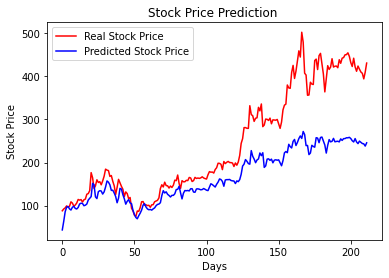

In [39]:
# visualize the results

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction ')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##  Model Evaluation

In [41]:
# metric used is RMSE. the smaller the RMSE value, the better the model.

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

98.77993708423436


## Summary of Findings

Our model has an RMSE of 98 against a target RMSE of less than 24, and therefore, we didn't meet our success criteria.

## Recommendation

I recommend trying other algorithms before settling for RNN.

## Challenging the Solution

Did we have the right question? Yes

Did we have the right data? Yes

The following steps can be used to improve our model's performance:

* Get/invent more training data
* Increase/decrease neurons in the LSTM layers
* Increase/decrease LSTM layers
* Increase/decrease the timesteps


